# HITASHU KANJANI
## NUID - 001348859

# DS 5010 FALL 2019

# PROJECT CODE AND REPORT

# TITLE : STOCK ANALYSIS AND PREDICTION FOR S&P 500 COMPANIES


# Project Idea and Goal

My project revolves around S&P 500 companies. The aim is to get the stock price data.I'll manipulate and visualize the data and attempt to come up with a strategy for investing in companies, thereby apply some regression techniques, basic machine learning algorithms,time series forecasting,some deep learning, and then learn how to back-test a strategy.
For achieving the above mentioned aim,
I divided my project into respective stages

Stage 1 - Web Scraping wikipedia to get the 500 tickers and then scraping the yahoo finance website to get the stock prices of all 500 companies

Stage 2 - combining all the ['Adj Close'] data and Volume data of every company in one data frame in order to do data cleaning and pre processing

Stage 3 - Visualize the data using heat maps and then creating a correlation table/matrix of the entire dataset

Stage 4 - Creating the targets for machine learning labels and apply machine learning algorithms

Stage 5 - Applying machine Learning to predict the stock prices and the overall accuracy using various machine learning algorithms




## Modules used
pandas , pandas data reader , numpy, yfinance, BeautifulSoup , asyncio, requests, requests_html, matplotlib, sklearn,

### Algorithms used
cross validation
random forest classifier
voting classifier
k nearest neighbours


# Stage 1 & Stage 2

web scraping for the tickers

web scraping for stock data

creating correlation for all companies

dividing companies into sectors and creating correlation sector-wise

visualisation


# Importing the necessary modules

In [1]:
from bs4 import BeautifulSoup
import asyncio # for rendering via HTML, we use asynco in JUPYTER notebook.Its not needed otherwise
import requests
import datetime
import numpy as np
import os
import pickle
import datetime as dt
import pandas as pd
from requests_html import HTMLSession
import matplotlib.pyplot as plt
# import pandas_datareader.data as web 
from pandas_datareader import data as pdr
option_tag_list = []
import yfinance as yf

# Defining the start date and end date since when the stock data is available

In [2]:
yf.pdr_override
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,11,9)


# Creating the HTML session of the page as it is dynamically loaded 
The page is loaded in JAVASCRIPT so we have to render the entire page in HTML
## Extracting the 500 S&P tickers from WIKIPEDIA

In [3]:

session = HTMLSession()
resp = session.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#resp.html.render()
html_response = resp.html.html

tickers = [] 

ticker_list = [] 
a1  =[]
soup = BeautifulSoup(html_response,'lxml')

option_tags = soup.find('table',attrs = {'class':'wikitable sortable'})
# print(option_tags)

for i in option_tags.findAll('tr')[1:]:
    ticker = i.findAll('td')[0].text.replace('.', '-')#the 0th column contains the ticker values
    ticker = ticker[:-1]
    ticker_list.append(ticker) 
print(ticker_list)


['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CM

# Creating the directory that stores the stock data of all comapnies in CSV format
For each ticker , it scrapes the Yahoo Finance Website in Real Time and gets the stock data

This part of code takes a lot of time to run so the '500 tickers.pickle' is already scrapped and attached as a seperate file 

In [4]:

if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')
with open("500tickers.pickle",'wb') as t:
	pickle.dump(ticker_list,t)
with open('500tickers.pickle','rb') as f:
	tickers = pickle.load(f)
for i in tickers:
	df = pdr.get_data_yahoo(i, start, end)
	df.reset_index(inplace=True)
	df.set_index("Date", inplace=True)
	df.to_csv('stock_dfs/{}.csv'.format(i))



# Checking whether our Stock_dfs directory has all 500 tickers scrapped in real time

In [5]:
os.listdir('stock_dfs')

['A.csv',
 'AAL.csv',
 'AAP.csv',
 'AAPL.csv',
 'ABBV.csv',
 'ABC.csv',
 'ABMD.csv',
 'ABT.csv',
 'ACN.csv',
 'ADBE.csv',
 'ADI.csv',
 'ADM.csv',
 'ADP.csv',
 'ADS.csv',
 'ADSK.csv',
 'AEE.csv',
 'AEP.csv',
 'AES.csv',
 'AFL.csv',
 'AGN.csv',
 'AIG.csv',
 'AIV.csv',
 'AIZ.csv',
 'AJG.csv',
 'AKAM.csv',
 'ALB.csv',
 'ALGN.csv',
 'ALK.csv',
 'ALL.csv',
 'ALLE.csv',
 'ALXN.csv',
 'AMAT.csv',
 'AMCR.csv',
 'AMD.csv',
 'AME.csv',
 'AMG.csv',
 'AMGN.csv',
 'AMP.csv',
 'AMT.csv',
 'AMZN.csv',
 'ANET.csv',
 'ANSS.csv',
 'ANTM.csv',
 'AON.csv',
 'AOS.csv',
 'APA.csv',
 'APD.csv',
 'APH.csv',
 'APTV.csv',
 'ARE.csv',
 'ARNC.csv',
 'ATO.csv',
 'ATVI.csv',
 'AVB.csv',
 'AVGO.csv',
 'AVY.csv',
 'AWK.csv',
 'AXP.csv',
 'AZO.csv',
 'BA.csv',
 'BAC.csv',
 'BAX.csv',
 'BBT.csv',
 'BBY.csv',
 'BDX.csv',
 'BEN.csv',
 'BF-B.csv',
 'BIIB.csv',
 'BK.csv',
 'BKNG.csv',
 'BKR.csv',
 'BLK.csv',
 'BLL.csv',
 'BMY.csv',
 'BR.csv',
 'BRK-B.csv',
 'BSX.csv',
 'BWA.csv',
 'BXP.csv',
 'C.csv',
 'CAG.csv',
 'CAH.csv'

# Appending all the 500 csv file in one single file to create the correlation table

To check the correlation that one comapny has with another, we combine the stock values of all companies in one single data frame

This part combines the stock data of all companies and it takes a lot of time to run
'Combined_data' file is already attached with the submission

In [6]:
with open("500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')

    if count % 10 == 0:
        print(count)
    #print(main_df.head())
    main_df.to_csv('combined_data')


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


# Creating a correlation matrix


In [8]:
df = pd.read_csv('combined_data')
df_corr = df.corr()
#print(df_corr.head(20))
data  = df_corr.values
print(data)

[[ 1.          0.91208284  0.92201405 ...  0.90284306 -0.01138775
   0.71093941]
 [ 0.91208284  1.          0.77758081 ...  0.8393443  -0.01798633
   0.97442247]
 [ 0.92201405  0.77758081  1.         ...  0.71379971  0.90159314
   0.7959454 ]
 ...
 [ 0.90284306  0.8393443   0.71379971 ...  1.          0.17833276
   0.74544196]
 [-0.01138775 -0.01798633  0.90159314 ...  0.17833276  1.
   0.81487671]
 [ 0.71093941  0.97442247  0.7959454  ...  0.74544196  0.81487671
   1.        ]]


# Visualizing the Correlation Matrix


<IPython.core.display.Javascript object>


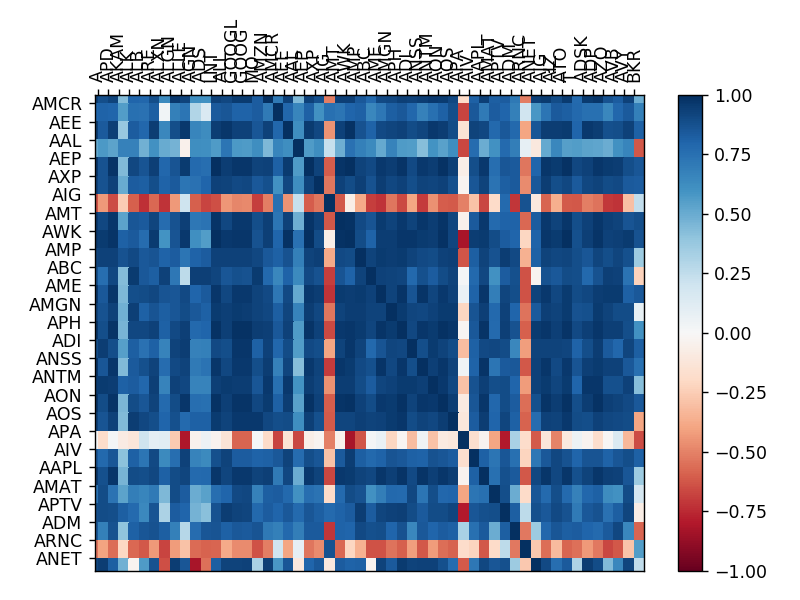

In [10]:
%matplotlib notebook
# import mpld3
# mpld3.enable_notebook()
# plt.rcParams['figure.figsize'] = [19.5,16]
figg = plt.figure()
ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data,cmap = plt.cm.RdBu)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data.shape[0]),minor  =False)#set ticks to x axis
ax2 = ax.set_yticks(np.arange(data.shape[1]),minor  =False)#set ticks to y axis
ax.invert_yaxis()#in matplotlib y has a little space on top which doesn't makes sense in this case
ax.xaxis.tick_top()#move x axis tips from bottom to top


labels_c = df_corr.columns
labels_r = df_corr.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)#set color limit of the labels
plt.tight_layout()
plt.show()

###  ZOOM THE ABOVE FIGURE TO SEE THE DETAILS 
#### Press the Home button to go back


# We can see the figure is difficult to comprehend
### so now we divide the 500 companies into different sectors to create the correlation table and heat map for each sector 

# Web Scraping to get the SECTORS of all companies

In [11]:
ticker_sector_list = []
ticker_dict = {}
for i in option_tags.findAll('tr')[1:]:
    ticker = i.findAll('td')[3].text.replace('.', '-')
    #x = line.rstrip("\n").split(",")
    #ticker = ticker[:-1]
    ticker_sector_list.append(ticker)
#print(ticker_sector_list)

for ticker,ticker_sector in zip(ticker_list,ticker_sector_list):
    ticker_dict[ticker] = ticker_sector
ticker_dict = {key: value.rstrip() for key, value in ticker_dict.items()}


# Grouping the ticker dictionary by sectors

In [12]:
sector_grouped_dictionary = {}

for key, value in sorted(ticker_dict.items()):
    sector_grouped_dictionary.setdefault(value, []).append(key)
print(sector_grouped_dictionary.keys())
#print(sector_grouped_dictionary['Consumer Discretionary'])

dict_keys(['Health Care', 'Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Utilities', 'Financials', 'Real Estate', 'Materials', 'Energy', 'Communication Services'])


# Combining all the companies (sector wise) and creating seperate data frames for each sector

This part of code takes a long time to run so (stock_dfs1) folder is attached

In [13]:
health = sector_grouped_dictionary['Health Care']
industrials = sector_grouped_dictionary['Industrials']
consumerd = sector_grouped_dictionary['Consumer Discretionary']
info_tech = sector_grouped_dictionary['Information Technology']
consumer_s = sector_grouped_dictionary['Consumer Staples']
utilities = sector_grouped_dictionary['Utilities']
financials = sector_grouped_dictionary['Financials']
real_estate = sector_grouped_dictionary['Real Estate']
materials = sector_grouped_dictionary['Materials']
energy = sector_grouped_dictionary['Energy']
commu_s = sector_grouped_dictionary['Communication Services']

# creating the dataframe for health sector
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/health'):
    os.makedirs('stock_dfs1/health')
with open('health.pickle','wb') as t:
    pickle.dump(health,t)
with open('health.pickle','rb') as f:
    tickers_health = pickle.load(f)
for i in tickers_health:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/health/{}.csv'.format(i))

# creating the dataframe for industrials sector    
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/industrials'):
    os.makedirs('stock_dfs1/industrials')
with open('industrials.pickle','wb') as t:
    pickle.dump(industrials,t)
with open('industrials.pickle','rb') as f:
    tickers_industrial = pickle.load(f)
for i in tickers_industrial:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/industrials/{}.csv'.format(i))
    
# creating the dataframe for consumer discretionary sector
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/consumer_discretionary'):
    os.makedirs('stock_dfs1/consumer_discretionary')
with open('consumer_discretionary.pickle','wb') as t:
    pickle.dump(consumerd,t)
with open('consumer_discretionary.pickle','rb') as f:
    tickers_consumer_discretionary = pickle.load(f)
for i in tickers_consumer_discretionary:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/consumer_discretionary/{}.csv'.format(i))
    
# creating the dataframe for information technology sector    
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/Information_Technology'):
    os.makedirs('stock_dfs1/Information_Technology')
with open('Information_Technology.pickle','wb') as t:
    pickle.dump(info_tech,t)
with open('Information_Technology.pickle','rb') as f:
    tickers_Information_Technology = pickle.load(f)
for i in tickers_Information_Technology:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/Information_Technology/{}.csv'.format(i))

 # # creating the dataframe for Consumer staples sector   
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/Consumer_Staples'):
    os.makedirs('stock_dfs1/Consumer_Staples')
with open('Consumer_Staples.pickle','wb') as t:
    pickle.dump(consumer_s,t)
with open('Consumer_Staples.pickle','rb') as f:
    tickers_Consumer_Staples = pickle.load(f)
for i in tickers_Consumer_Staples:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/Consumer_Staples/{}.csv'.format(i))

# creating the dataframe for utilities sector    
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/Utilities'):
    os.makedirs('stock_dfs1/Utilities')
with open('Utilities.pickle','wb') as t:
    pickle.dump(utilities,t)
with open('Utilities.pickle','rb') as f:
    tickers_Utilities = pickle.load(f)
for i in tickers_Utilities:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/Utilities/{}.csv'.format(i))

#creating the dataframe for financials sector    
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/Financials'):
    os.makedirs('stock_dfs1/Financials')
with open('Financials.pickle','wb') as t:
    pickle.dump(financials,t)
with open('Financials.pickle','rb') as f:
    tickers_Financials = pickle.load(f)
for i in tickers_Financials:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/Financials/{}.csv'.format(i))
    

# creating the dataframe for real estate sector    
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/real_estate'):
    os.makedirs('stock_dfs1/real_estate')
with open('real_estate.pickle','wb') as t:
    pickle.dump(real_estate,t)
with open('real_estate.pickle','rb') as f:
    tickers_real_estate = pickle.load(f)
for i in tickers_real_estate:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/real_estate/{}.csv'.format(i))

# creating the dataframe  for materials sector    
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/materials'):
    os.makedirs('stock_dfs1/materials')
with open('materials.pickle','wb') as t:
    pickle.dump(materials,t)
with open('materials.pickle','rb') as f:
    tickers_materials = pickle.load(f)
for i in tickers_materials:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/materials/{}.csv'.format(i))
    
 # creating the dataframe for energy sector   
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/energy'):
    os.makedirs('stock_dfs1/energy')
with open('energy.pickle','wb') as t:
    pickle.dump(energy,t)
with open('energy.pickle','rb') as f:
    tickers_energy = pickle.load(f)
for i in tickers_energy:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/energy/{}.csv'.format(i))
    
# creating the dataframe for communication sector
if not os.path.exists('stock_dfs1'):
    os.makedirs('stock_dfs1')
if not os.path.exists('stock_dfs1/Communication_Services'):
    os.makedirs('stock_dfs1/Communication_Services')
with open('Communication_Services.pickle','wb') as t:
    pickle.dump(commu_s,t)
with open('Communication_Services.pickle','rb') as f:
    tickers_Communication_Services = pickle.load(f)
for i in tickers_Communication_Services:
    df = pdr.get_data_yahoo(i,start,end)
    df.reset_index(inplace =True)
    df.set_index('Date',inplace = True)
    df.to_csv('stock_dfs1/Communication_Services/{}.csv'.format(i))
 

# Creating Correlation tables sector wise and visualizing it

## HEALTH sector 

['A', 'ABBV', 'ABC', 'ABMD', 'ABT', 'AGN', 'ALGN', 'ALXN', 'AMGN', 'ANTM', 'BAX', 'BDX', 'BIIB', 'BMY', 'BSX', 'CAH', 'CERN', 'CI', 'CNC', 'COO', 'CVS', 'DGX', 'DHR', 'DVA', 'EW', 'GILD', 'HCA', 'HOLX', 'HSIC', 'HUM', 'IDXX', 'ILMN', 'INCY', 'IQV', 'ISRG', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD', 'MYL', 'PFE', 'PKI', 'PRGO', 'REGN', 'RMD', 'SYK', 'TFX', 'TMO', 'UHS', 'UNH', 'VAR', 'VRTX', 'WAT', 'WCG', 'XRAY', 'ZBH', 'ZTS']
[[1.         0.88940698 0.76339257 ... 0.622142   0.86608112 0.92327036]
 [0.88940698 1.         0.56046433 ... 0.20713628 0.71374414 0.7959454 ]
 [0.76339257 0.56046433 1.         ... 0.88562702 0.86251196 0.42355081]
 ...
 [0.622142   0.20713628 0.88562702 ... 1.         0.84385195 0.10210167]
 [0.86608112 0.71374414 0.86251196 ... 0.84385195 1.         0.74587123]
 [0.92327036 0.7959454  0.42355081 ... 0.10210167 0.74587123 1.        ]]


<IPython.core.display.Javascript object>


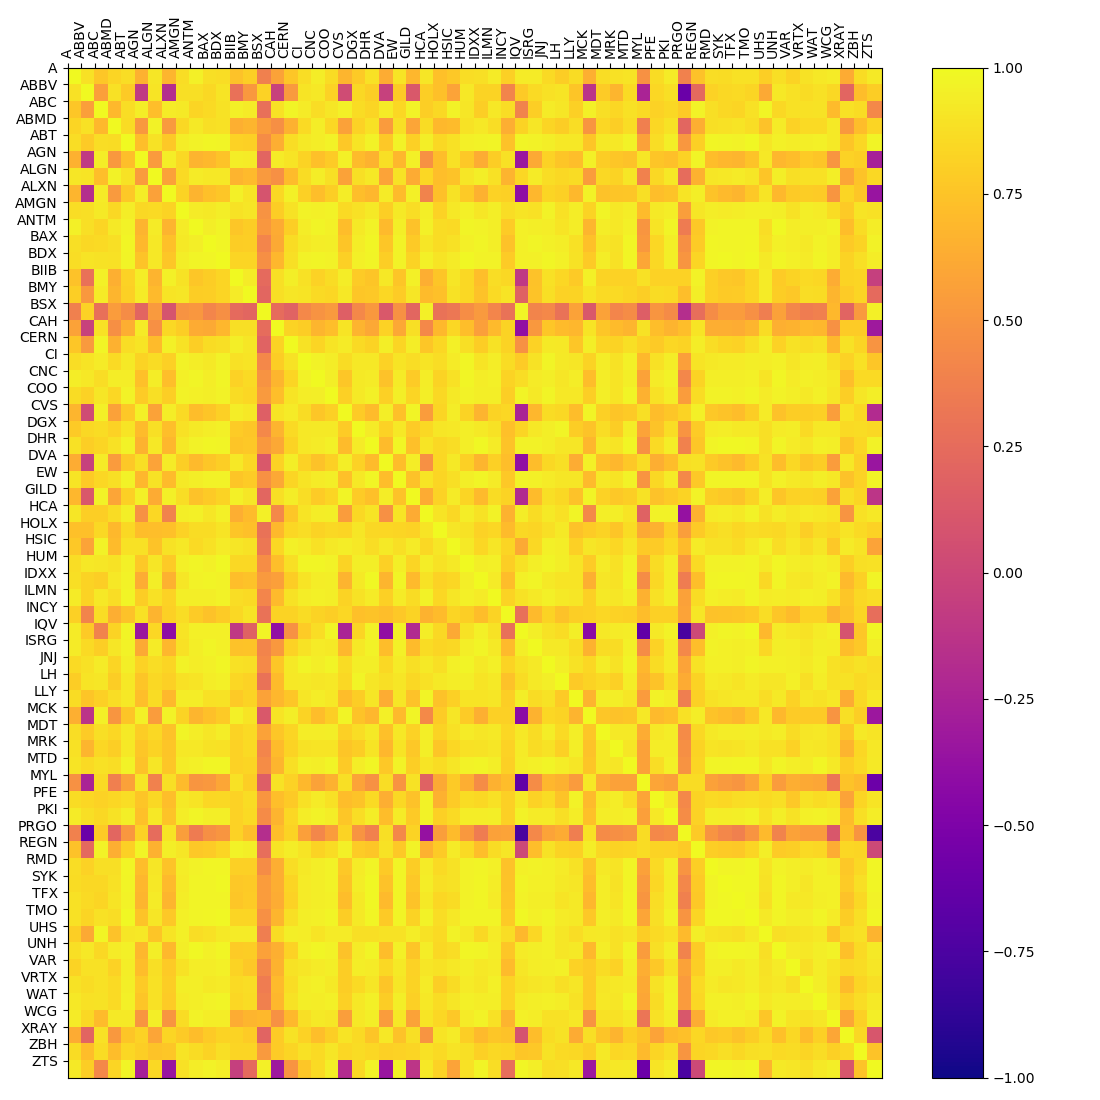

In [15]:
import seaborn as sns
from matplotlib.pyplot import figure

with open("health.pickle", "rb") as f:
    tickers = pickle.load(f)
    print(tickers)
main_df1 = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df1 = pd.read_csv('stock_dfs1/health/{}.csv'.format(ticker))
    df1.set_index('Date', inplace=True)

    df1.rename(columns={'Adj Close': ticker}, inplace=True)
    df1.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df1.empty:
        main_df1 = df1
    else:
        main_df1 = main_df1.join(df1, how='outer')
    main_df1.to_csv('health_combined_data')
    
    
df_health = pd.read_csv('health_combined_data')
df_corr_health = df_health.corr()
data_health  = df_corr_health.values
print(data_health)

%matplotlib notebook
figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_health,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_health.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_health.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_health.columns
labels_r = df_corr_health.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()


### We can see that there is a strong positive correlation between the companies in the health sector

## INDUSTRIAL sector

[[ 1.          0.67930558 -0.05253467 ...  0.60489423  0.51961472
   0.53298467]
 [ 0.67930558  1.          0.40397671 ...  0.93006072  0.8582529
   0.62115476]
 [-0.05253467  0.40397671  1.         ... -0.05543206  0.96693562
   0.93201256]
 ...
 [ 0.60489423  0.93006072 -0.05543206 ...  1.          0.81768147
   0.53529564]
 [ 0.51961472  0.8582529   0.96693562 ...  0.81768147  1.
   0.97034524]
 [ 0.53298467  0.62115476  0.93201256 ...  0.53529564  0.97034524
   1.        ]]


<IPython.core.display.Javascript object>


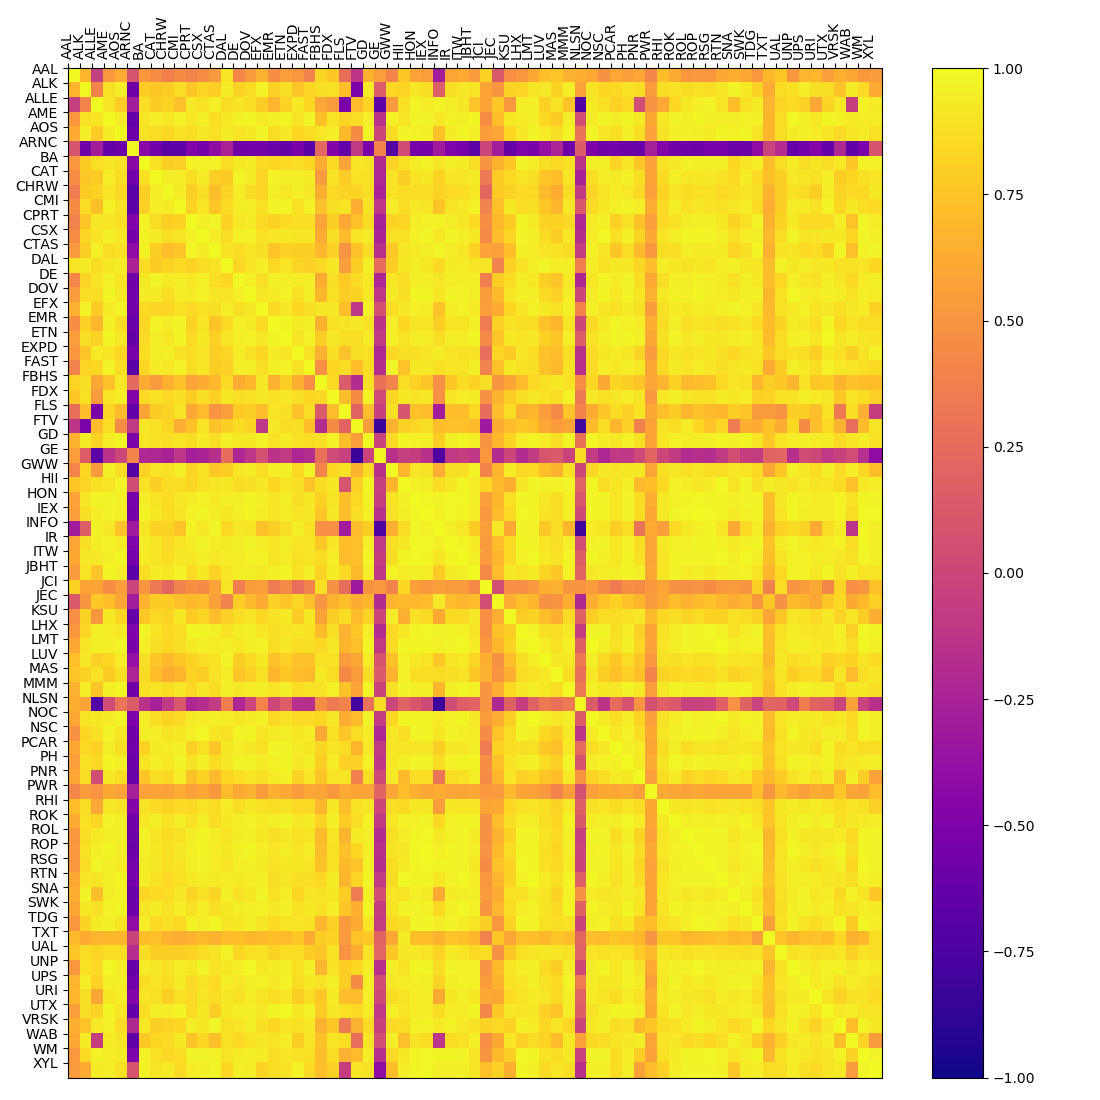

In [16]:
with open("industrials.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/industrials/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('industrials_combined_data')
    
    
df_industrials = pd.read_csv('industrials_combined_data')
df_corr_industrials = df_industrials.corr()
data_industrials  = df_corr_industrials.values
print(data_industrials)

%matplotlib notebook
figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_industrials,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_industrials.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_industrials.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_industrials.columns
labels_r = df_corr_industrials.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

### we can see here that stocks of some companies inversely affect other

# Consumer Discretionary

[[1.         0.75973452 0.6053038  ... 0.89761622 0.69737738 0.87496902]
 [0.75973452 1.         0.8345934  ... 0.71233448 0.60240681 0.93119289]
 [0.6053038  0.8345934  1.         ... 0.71801371 0.37464269 0.82125977]
 ...
 [0.89761622 0.71233448 0.71801371 ... 1.         0.74918741 0.84351264]
 [0.69737738 0.60240681 0.37464269 ... 0.74918741 1.         0.7525361 ]
 [0.87496902 0.93119289 0.82125977 ... 0.84351264 0.7525361  1.        ]]


<IPython.core.display.Javascript object>


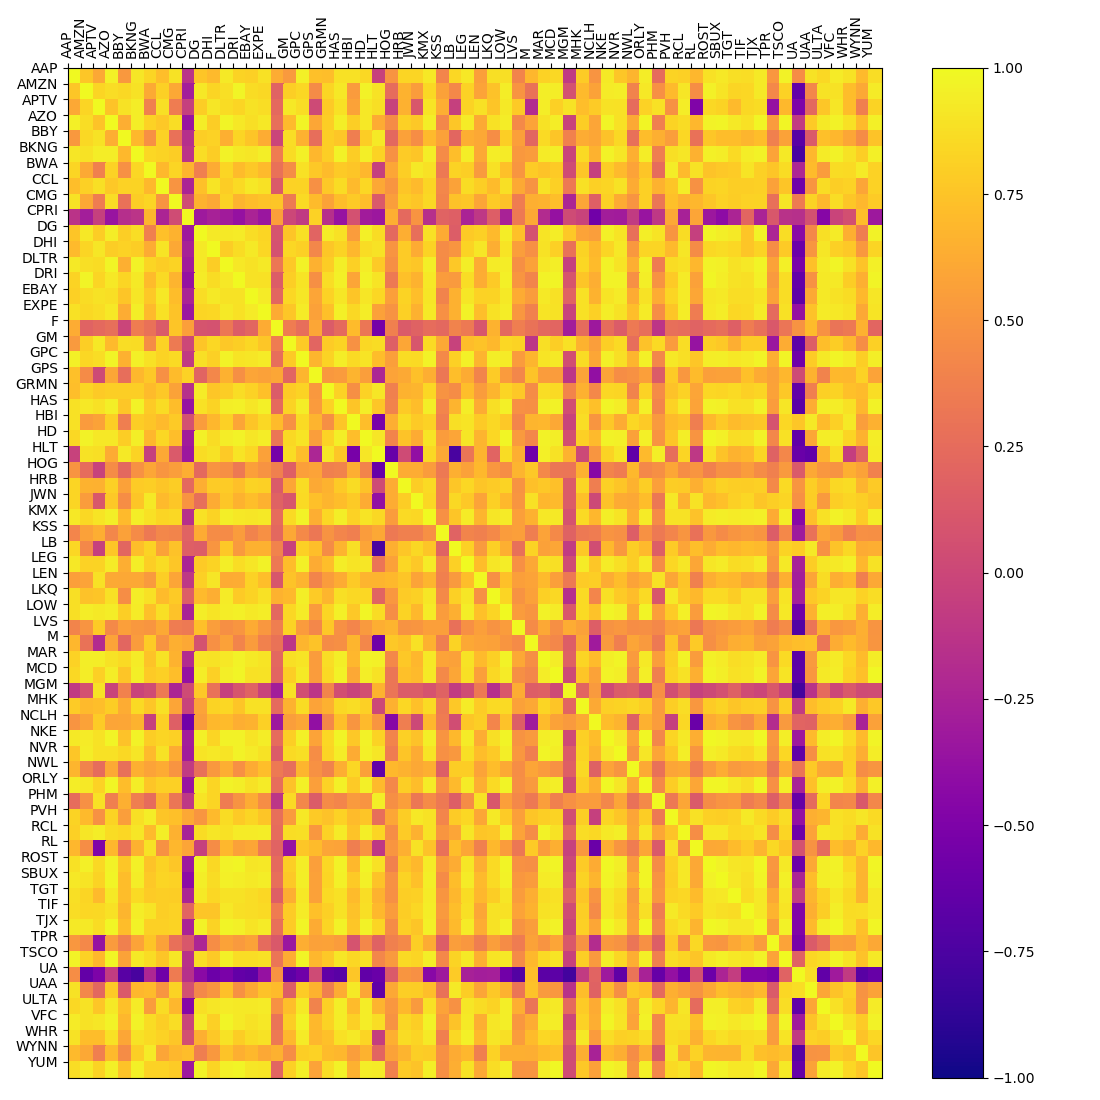

In [21]:
with open("consumer_discretionary.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/consumer_discretionary/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('consumer_discretionary_combined_data')
    
    
df_consumer_discretionary = pd.read_csv('consumer_discretionary_combined_data')
df_corr_consumer_discretionary = df_consumer_discretionary.corr()
data_consumer_discretionary  = df_corr_consumer_discretionary.values
print(data_consumer_discretionary)

%matplotlib notebook
figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_consumer_discretionary,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_consumer_discretionary.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_consumer_discretionary.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_consumer_discretionary.columns
labels_r = df_corr_consumer_discretionary.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Information Technology

[[ 1.          0.98218611  0.92140162 ...  0.64762496  0.83532094
  -0.0013664 ]
 [ 0.98218611  1.          0.9470968  ...  0.68161555  0.93638994
   0.09446483]
 [ 0.92140162  0.9470968   1.         ...  0.70335826  0.90066503
   0.12432094]
 ...
 [ 0.64762496  0.68161555  0.70335826 ...  1.          0.63564746
   0.54220307]
 [ 0.83532094  0.93638994  0.90066503 ...  0.63564746  1.
   0.18878978]
 [-0.0013664   0.09446483  0.12432094 ...  0.54220307  0.18878978
   1.        ]]


<IPython.core.display.Javascript object>


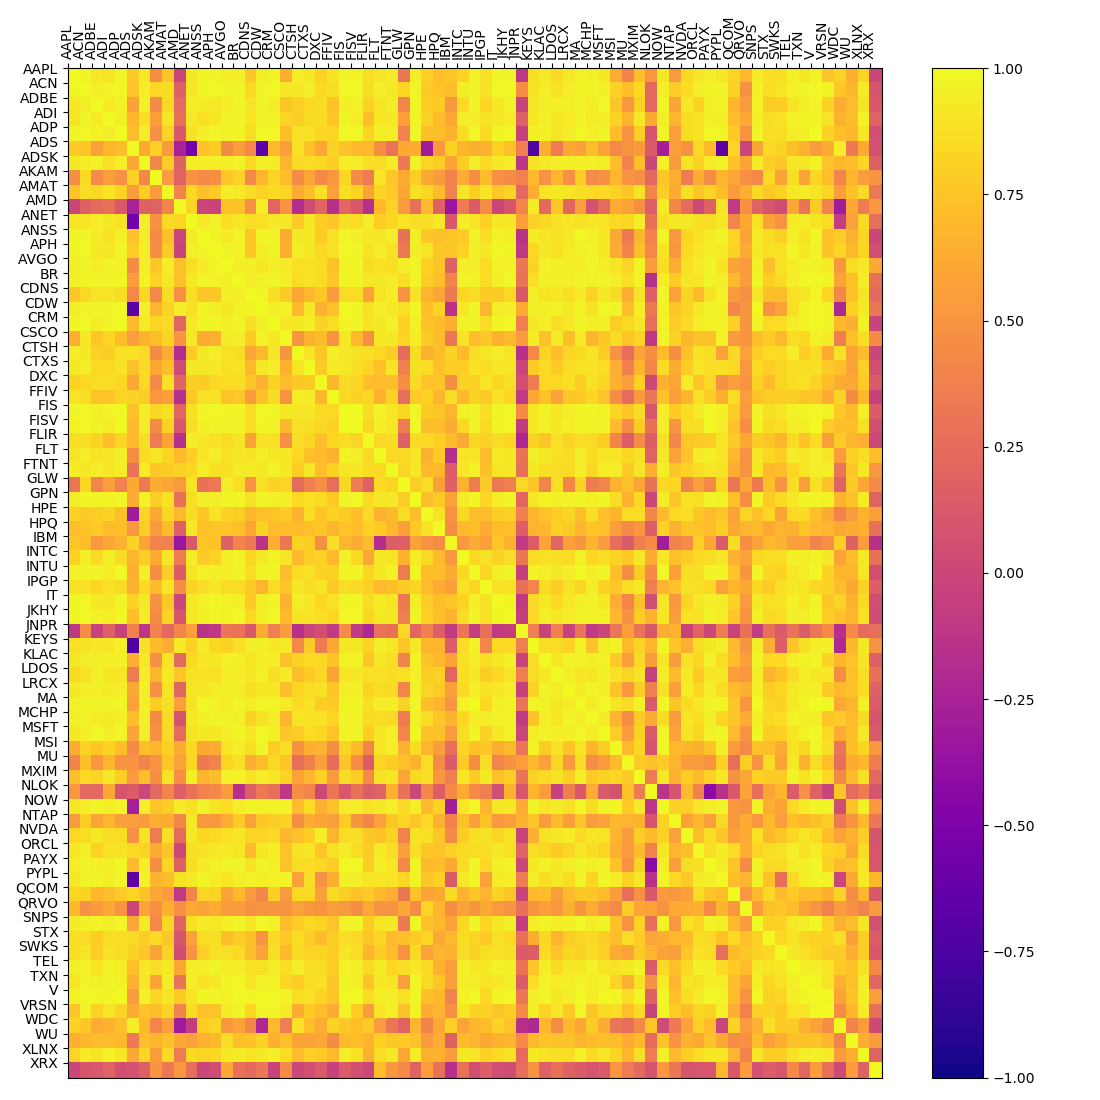

In [20]:
with open("Information_Technology.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/Information_Technology/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('Information_Technology_combined_data')
    
    
df_Information_Technology = pd.read_csv('Information_Technology_combined_data')
df_corr_Information_Technology = df_Information_Technology.corr()
data_Information_Technology  = df_corr_Information_Technology.values
print(data_Information_Technology)

%matplotlib notebook
figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_Information_Technology,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_Information_Technology.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_Information_Technology.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_Information_Technology.columns
labels_r = df_corr_Information_Technology.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Consumer Staples

[[1.         0.8711109  0.84099569 ... 0.79374763 0.82611986 0.76832839]
 [0.8711109  1.         0.92221664 ... 0.94690201 0.8467411  0.95095184]
 [0.84099569 0.92221664 1.         ... 0.92621401 0.91588183 0.83375856]
 ...
 [0.79374763 0.94690201 0.92621401 ... 1.         0.85836058 0.89853125]
 [0.82611986 0.8467411  0.91588183 ... 0.85836058 1.         0.73798672]
 [0.76832839 0.95095184 0.83375856 ... 0.89853125 0.73798672 1.        ]]


<IPython.core.display.Javascript object>


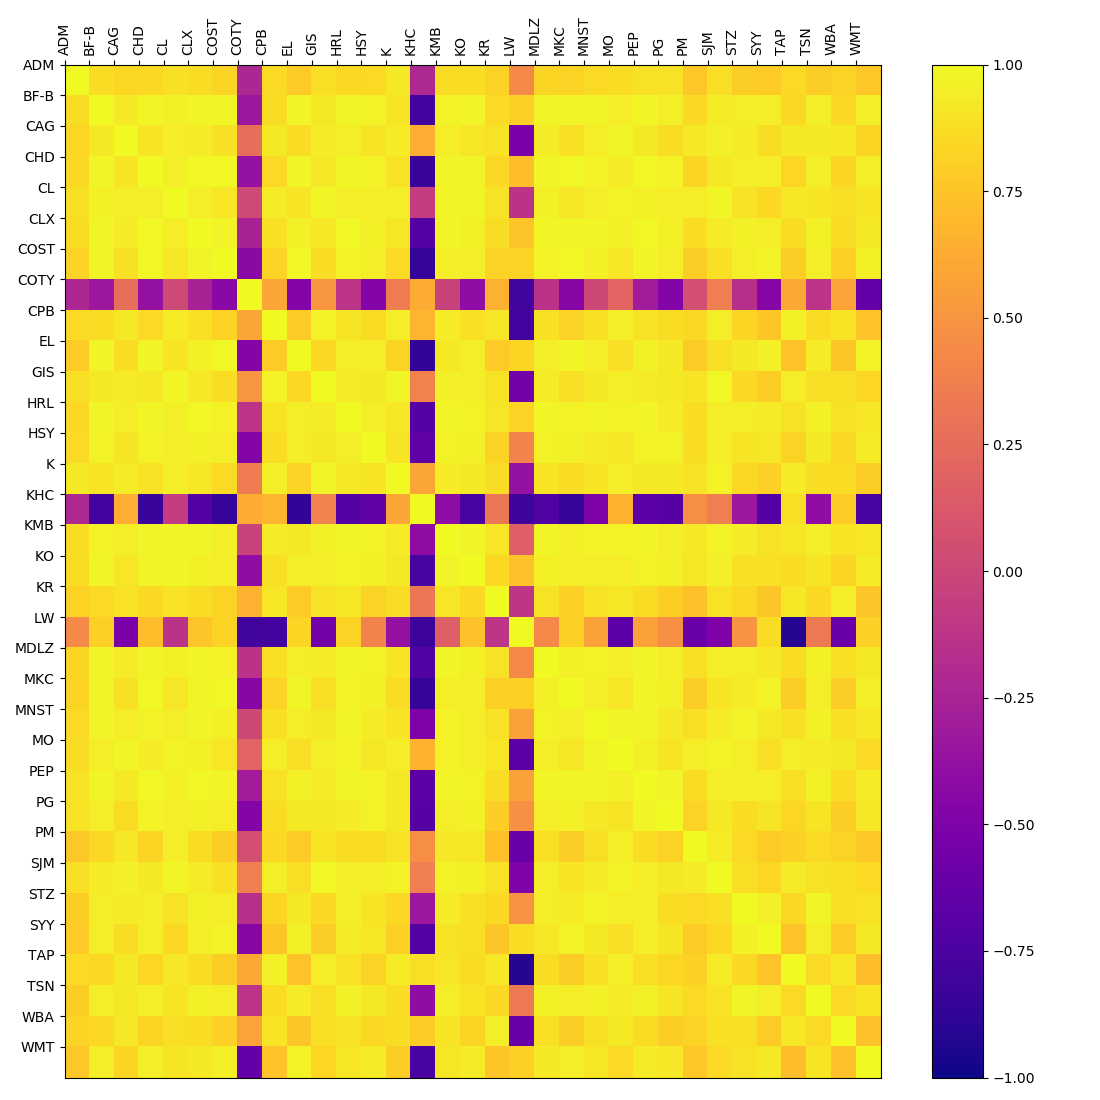

In [22]:
with open("Consumer_Staples.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/Consumer_Staples/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('Consumer_Staples_combined_data')
    
    
df_Consumer_Staples = pd.read_csv('Consumer_Staples_combined_data')
df_corr_Consumer_Staples = df_Consumer_Staples.corr()
data_Consumer_Staples  = df_corr_Consumer_Staples.values
print(data_Consumer_Staples)

%matplotlib notebook
figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_Consumer_Staples,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_Consumer_Staples.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_Consumer_Staples.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_Consumer_Staples.columns
labels_r = df_corr_Consumer_Staples.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Utilities

[[ 1.          0.95843649 -0.08860685  0.96009078  0.98836663  0.9243623
   0.87065765  0.87404378  0.95008014  0.90048188  0.91786084  0.87639715
   0.92622617  0.85485394  0.93972916  0.61243161  0.60804997  0.9480419
   0.96281929  0.950293    0.44598901  0.92209356  0.94373192  0.80595436
   0.87737706  0.90740508  0.93563338  0.94313422]
 [ 0.95843649  1.         -0.0800325   0.98815951  0.99342873  0.98105863
   0.94961767  0.95415156  0.99123151  0.97647942  0.97457354  0.92665069
   0.98897925  0.86148458  0.98427747  0.55302742  0.58675289  0.99422466
   0.98724757  0.9805085   0.39662153  0.95484031  0.98833134  0.85341669
   0.94556184  0.97155016  0.98744653  0.9933586 ]
 [-0.08860685 -0.0800325   1.         -0.12005811  0.61911242  0.03928298
   0.05034768 -0.20726371 -0.13695341  0.0185432  -0.20606674 -0.16657412
  -0.11513845 -0.21874272 -0.1179573  -0.11744198 -0.24069738 -0.10425119
  -0.11227128 -0.07892292  0.71679872 -0.16788095 -0.10983367 -0.21636086
  -0.2787795

<IPython.core.display.Javascript object>


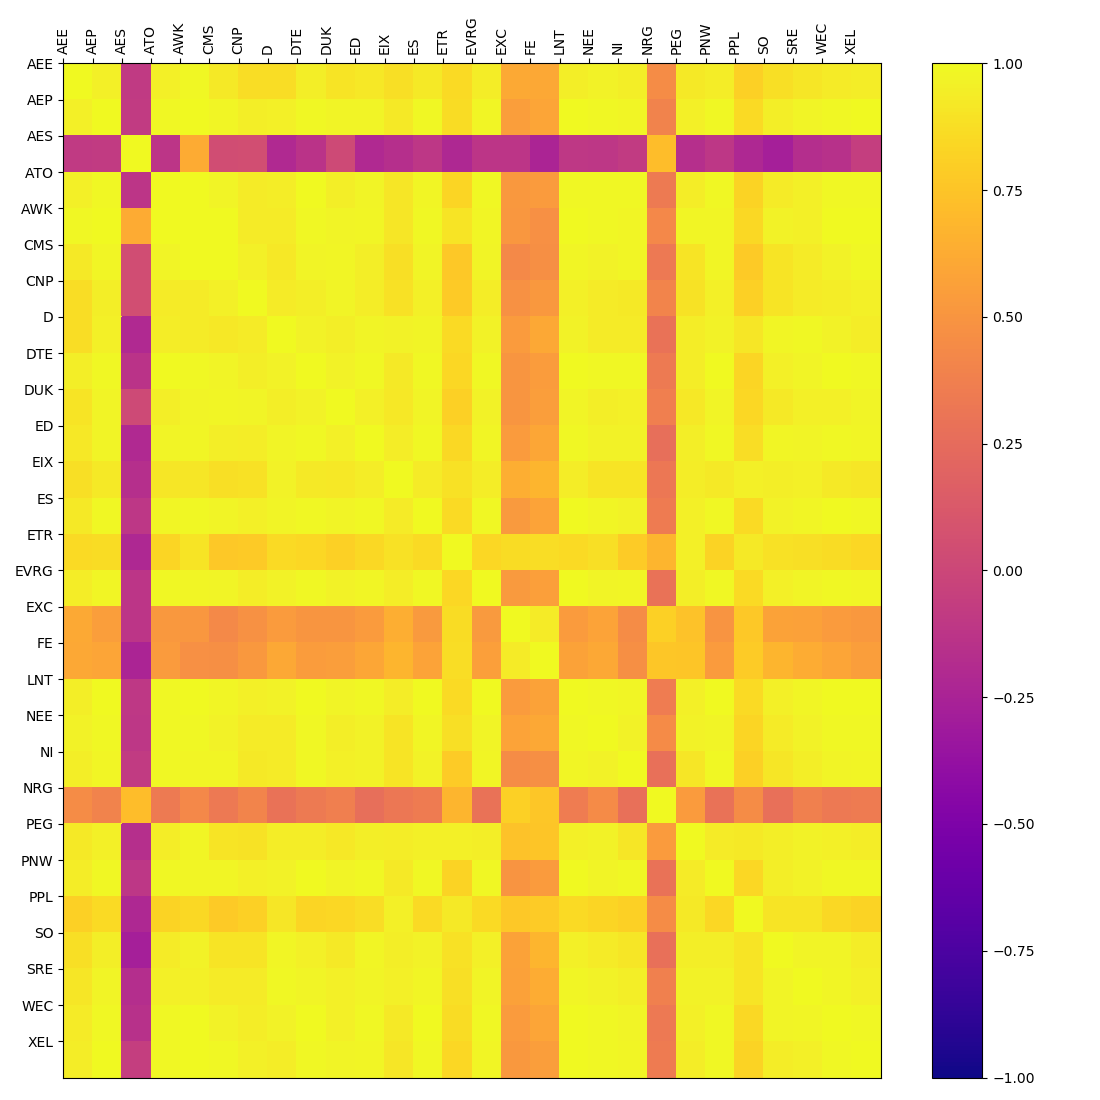

In [23]:
with open("Utilities.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/Utilities/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('Utilities_combined_data')
    
    
df_Utilities = pd.read_csv('Utilities_combined_data')
df_corr_Utilities = df_Utilities.corr()
data_Utilities  = df_corr_Utilities.values
print(data_Utilities)


figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_Utilities,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_Utilities.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_Utilities.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_Utilities.columns
labels_r = df_corr_Utilities.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Financials

[[ 1.         -0.63313718  0.94978995 ...  0.97237262  0.97393862
   0.0108531 ]
 [-0.63313718  1.         -0.36448741 ... -0.55772444 -0.63575127
   0.63700581]
 [ 0.94978995 -0.36448741  1.         ...  0.93551081  0.94658329
   0.16612263]
 ...
 [ 0.97237262 -0.55772444  0.93551081 ...  1.          0.97213885
   0.0541784 ]
 [ 0.97393862 -0.63575127  0.94658329 ...  0.97213885  1.
   0.03659328]
 [ 0.0108531   0.63700581  0.16612263 ...  0.0541784   0.03659328
   1.        ]]


<IPython.core.display.Javascript object>


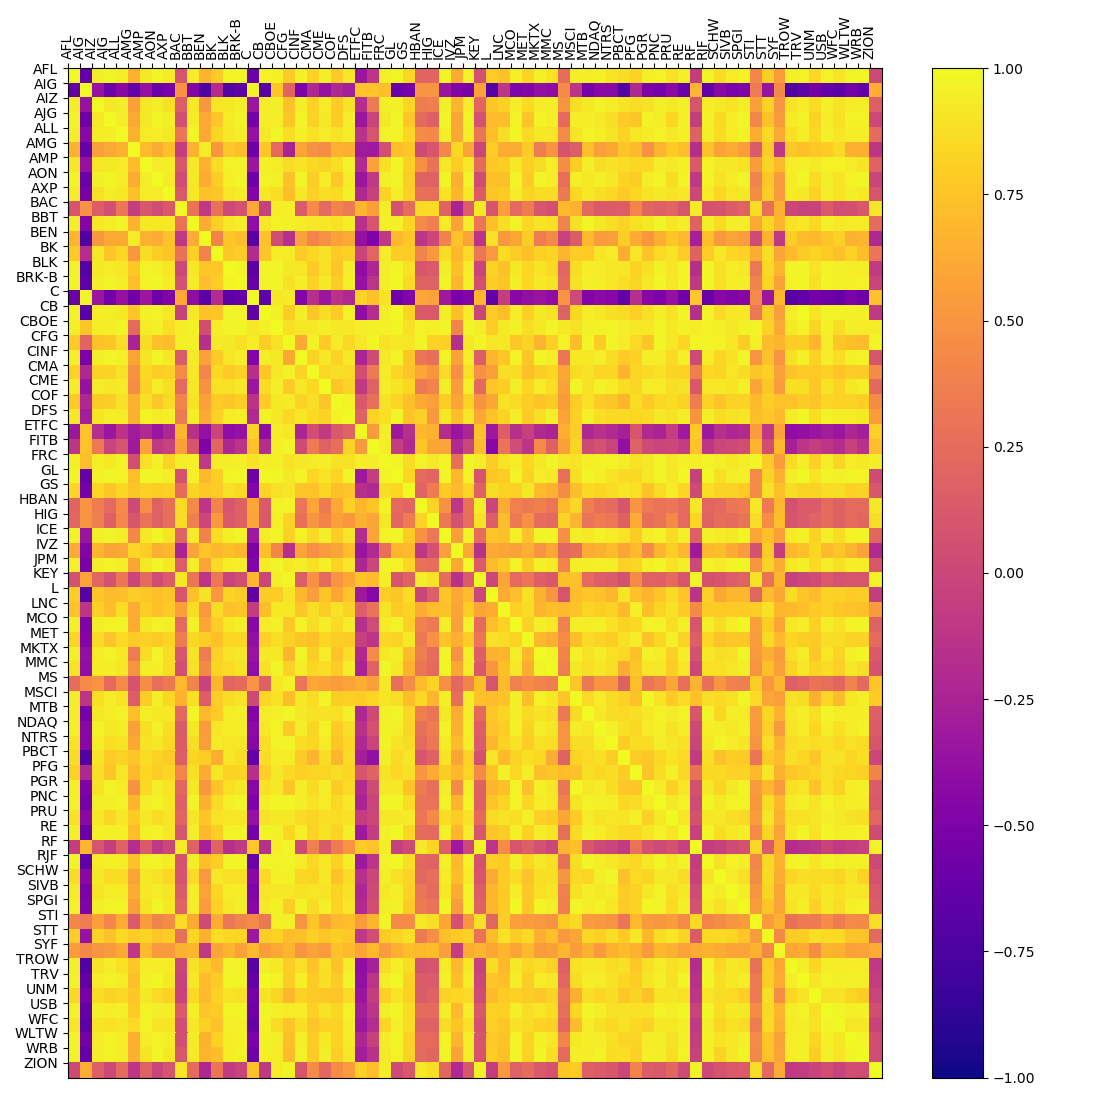

In [24]:
with open("Financials.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/Financials/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('Financials_combined_data')
    
    
df_Financials = pd.read_csv('Financials_combined_data')
df_corr_Financials = df_Financials.corr()
data_Financials  = df_corr_Financials.values
print(data_Financials)


figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_Financials,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_Financials.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_Financials.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_Financials.columns
labels_r = df_corr_Financials.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Real Estate

[[ 1.          0.84231841  0.90377629 ...  0.6689123   0.79239357
   0.1293764 ]
 [ 0.84231841  1.          0.91837289 ...  0.81971132  0.92982803
  -0.26044238]
 [ 0.90377629  0.91837289  1.         ...  0.80864663  0.89588073
  -0.01732208]
 ...
 [ 0.6689123   0.81971132  0.80864663 ...  1.          0.95448641
  -0.37299328]
 [ 0.79239357  0.92982803  0.89588073 ...  0.95448641  1.
  -0.3301056 ]
 [ 0.1293764  -0.26044238 -0.01732208 ... -0.37299328 -0.3301056
   1.        ]]


<IPython.core.display.Javascript object>


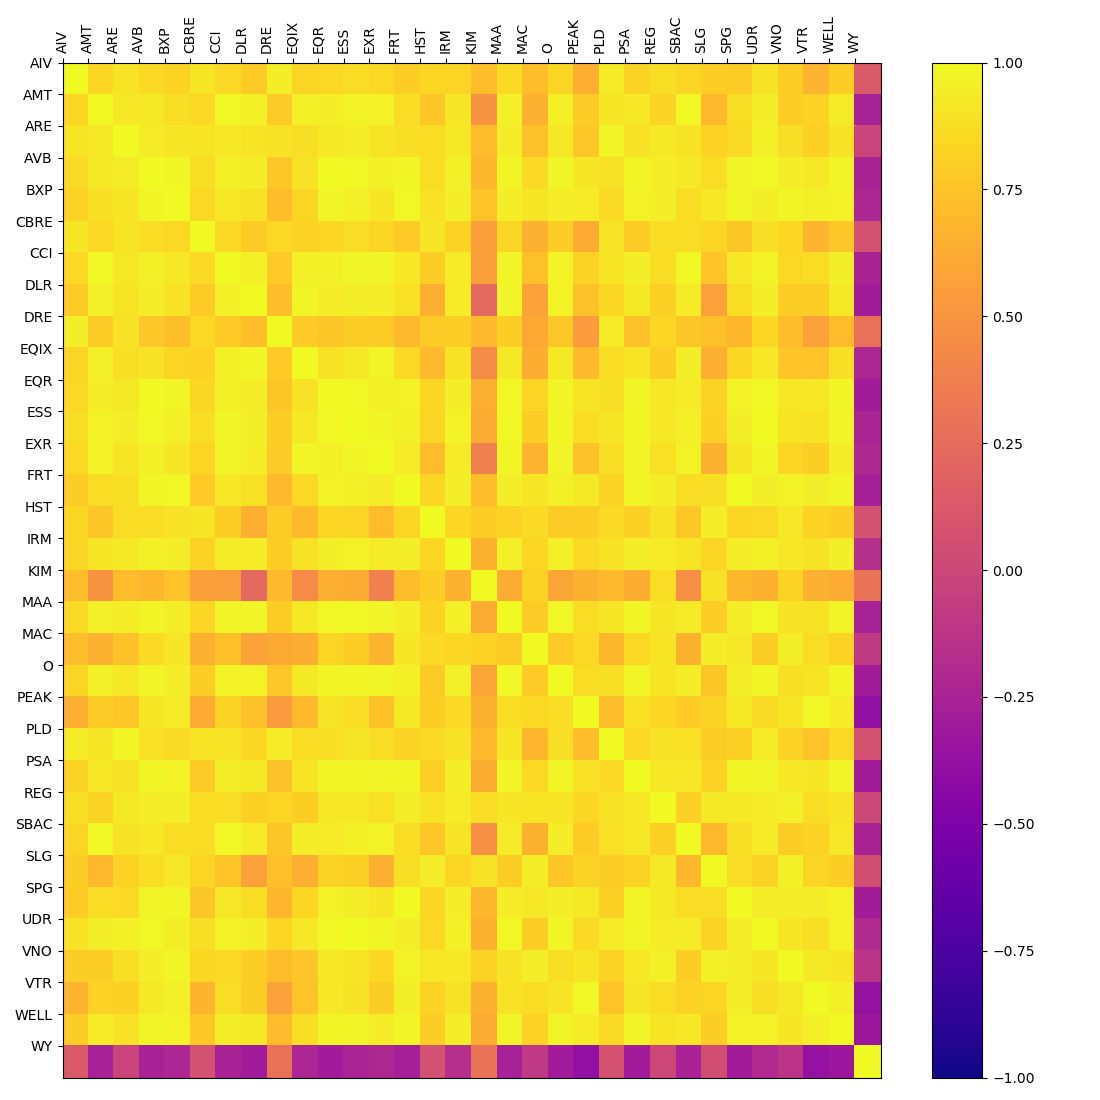

In [25]:
with open("real_estate.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/real_estate/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('real_estate_combined_data')
    
    
df_real_estate = pd.read_csv('real_estate_combined_data')
df_corr_real_estate = df_real_estate.corr()
data_real_estate = df_corr_real_estate.values
print(data_real_estate)


figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_real_estate,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_real_estate.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_real_estate.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_real_estate.columns
labels_r = df_corr_real_estate.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Materials

[[ 1.00000000e+00  7.44617030e-01  8.64063051e-01  7.34362119e-01
   8.36115463e-01  8.88650491e-01  6.71491800e-01 -1.14261476e-01
   8.60405935e-01  6.94234705e-01  8.65935200e-01  9.26037318e-01
   2.41024653e-01  9.16886385e-01  9.18031897e-01  8.37243785e-01
   8.98049026e-01  6.89909060e-01  8.81108902e-01  2.98916565e-01
   2.35560859e-01  8.74119414e-01  9.05865034e-01  8.80343284e-01
   7.73919092e-01  8.65680975e-01  7.71569483e-01  7.07221739e-01]
 [ 7.44617030e-01  1.00000000e+00  7.98544481e-01  8.43495222e-01
   7.10560649e-01  8.10979412e-01  1.52642017e-01  1.78990230e-02
   8.31903072e-01  4.68555300e-01  7.63323214e-01  6.65771611e-01
  -6.62574750e-01  5.48520948e-01  9.05091376e-01  8.21998567e-01
   6.53208306e-01  7.16760259e-01  8.70296502e-01 -7.99410660e-01
   1.33797362e-01  7.92533812e-01  8.70523390e-01  8.26573033e-01
   7.86748813e-01  7.86272729e-01  8.72568544e-01  3.82038876e-01]
 [ 8.64063051e-01  7.98544481e-01  1.00000000e+00  8.70200834e-01
   9.845

<IPython.core.display.Javascript object>


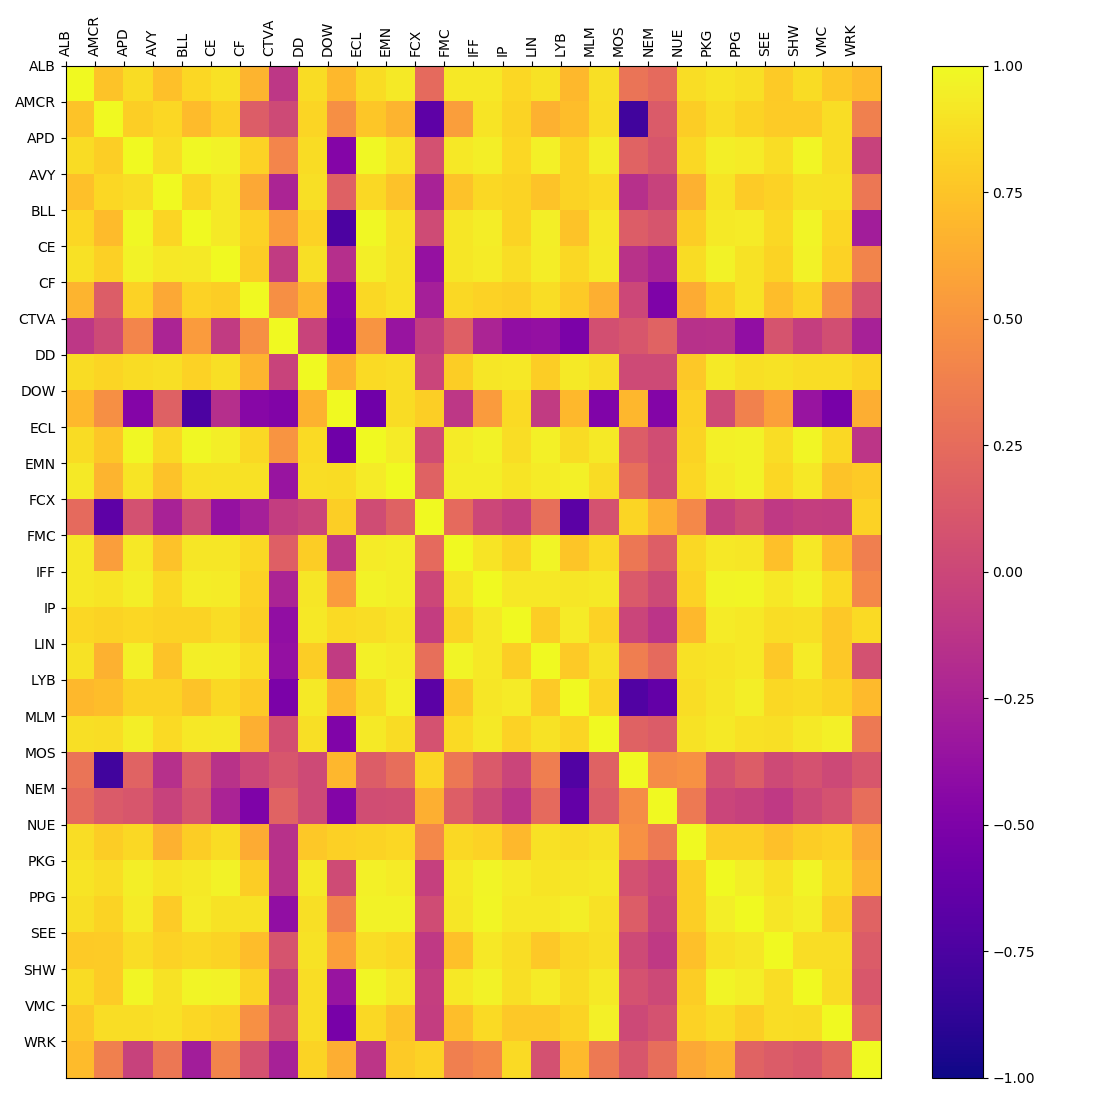

In [26]:
with open("materials.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/materials/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('materials_combined_data')
    
    
df_materials = pd.read_csv('materials_combined_data')
df_corr_materials = df_materials.corr()
data_materials = df_corr_materials.values
print(data_materials)


figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_materials,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_materials.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_materials.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_materials.columns
labels_r = df_corr_materials.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Energy

[[ 1.         -0.54064874  0.3271692   0.43820092  0.3275784  -0.43277699
   0.94026372  0.28732168 -0.60355756  0.55196066  0.57666055  0.75911356
   0.13488269  0.44371878  0.43081065 -0.76975083  0.75857259  0.70900124
   0.80055692  0.06681696  0.6606335  -0.72686621  0.24078082  0.70231953
  -0.01052199  0.1990678   0.18346338  0.49445271]
 [-0.54064874  1.         -0.16080911 -0.61203206  0.69628213 -0.66242846
  -0.31787105 -0.61766199 -0.40165576 -0.15773355 -0.69813554  0.37431177
  -0.69549882 -0.48375545  0.87144604 -0.60469914 -0.5316742  -0.31114297
  -0.70254111  0.7298258  -0.6910304  -0.0466092  -0.28189403 -0.56397772
  -0.19228198  0.35179158 -0.6961184  -0.04761469]
 [ 0.3271692  -0.16080911  1.          0.89651593  0.90588315  0.74143627
   0.31040901  0.89627543 -0.4384687   0.8916879   0.83485369  0.70689048
   0.84636724  0.92241586  0.5319535   0.10431905  0.75643534  0.85142747
   0.73546976  0.83597961  0.84710381 -0.18663585  0.93594521  0.78047634
   0.64347

<IPython.core.display.Javascript object>


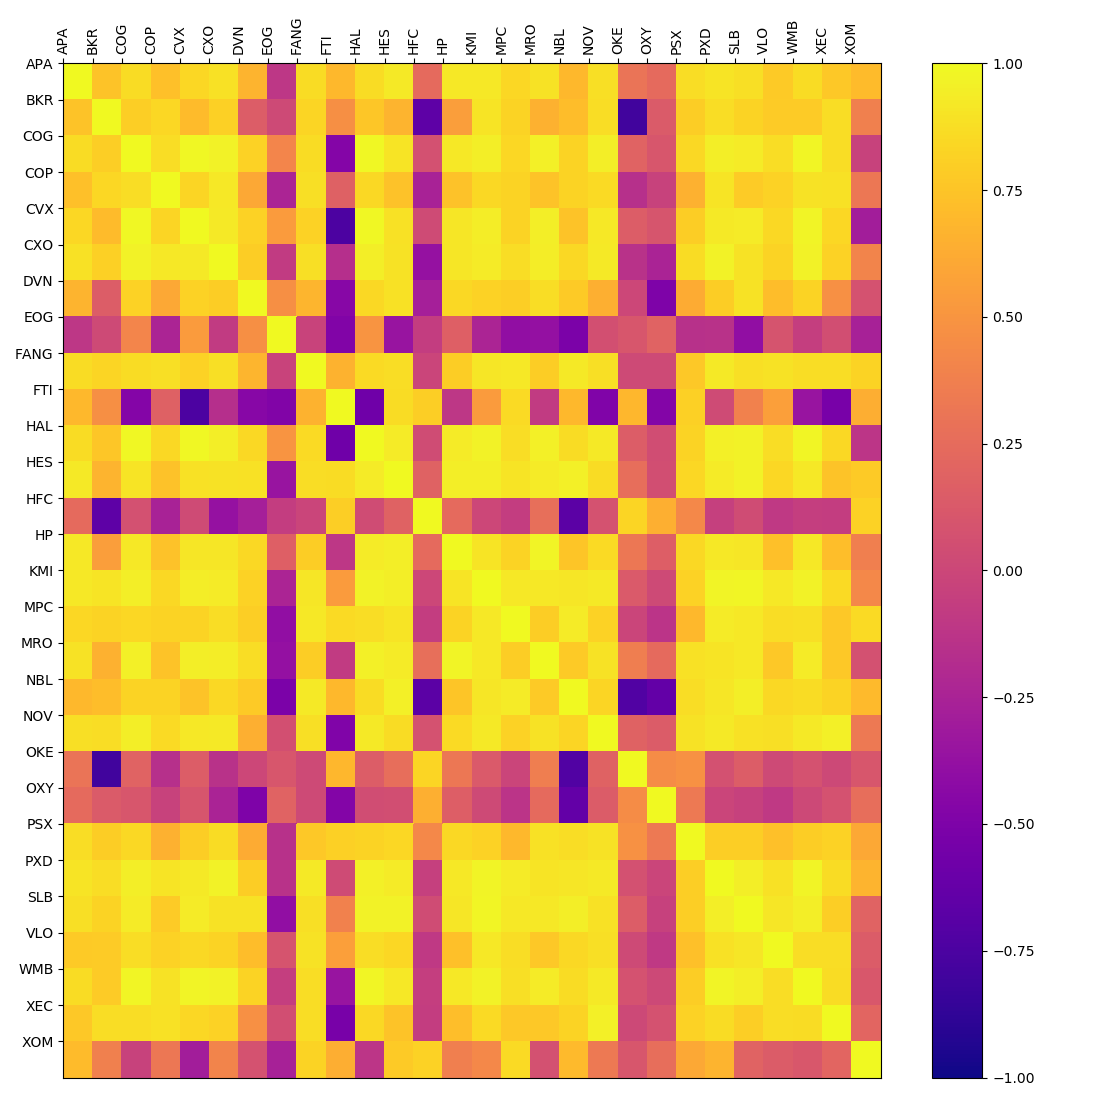

In [27]:
with open("energy.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/energy/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('energy_combined_data')
    
    
df_energy = pd.read_csv('energy_combined_data')
df_corr_energy = df_energy.corr()
data_energy = df_corr_energy.values
print(data_energy)


figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_materials,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_energy.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_energy.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_energy.columns
labels_r = df_corr_energy.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# Communication Services

[[ 1.          0.90470064  0.89843232  0.25220882  0.88017165  0.35284572
   0.17675111  0.52741479  0.85454084  0.93122532 -0.70748337 -0.69793598
   0.94755554  0.94835604  0.34709458  0.91155939 -0.11522312 -0.20920831
   0.85384338  0.83225797  0.84523515 -0.31491671  0.91598267 -0.38016124
   0.65384179  0.85707898]
 [ 0.90470064  1.          0.97510142 -0.53218347  0.92281059  0.04895689
   0.1352942   0.39470142  0.92299634  0.9525197  -0.67152633 -0.67952817
   0.96116248  0.96240447  0.9060077   0.8616494  -0.28185114 -0.35679166
   0.89545649  0.89339403  0.9716209  -0.28156582  0.90325477 -0.36102604
   0.67300833  0.90439097]
 [ 0.89843232  0.97510142  1.          0.3387329   0.978605    0.60187565
   0.50848457  0.72508482  0.75652074  0.94227064 -0.57527153 -0.6164351
   0.95889526  0.96089638  0.50582194  0.8648241  -0.32290694 -0.38221852
   0.96352266  0.91659224  0.84429875 -0.13629676  0.83376927 -0.30711721
   0.84380022  0.9607422 ]
 [ 0.25220882 -0.53218347  0.338

<IPython.core.display.Javascript object>


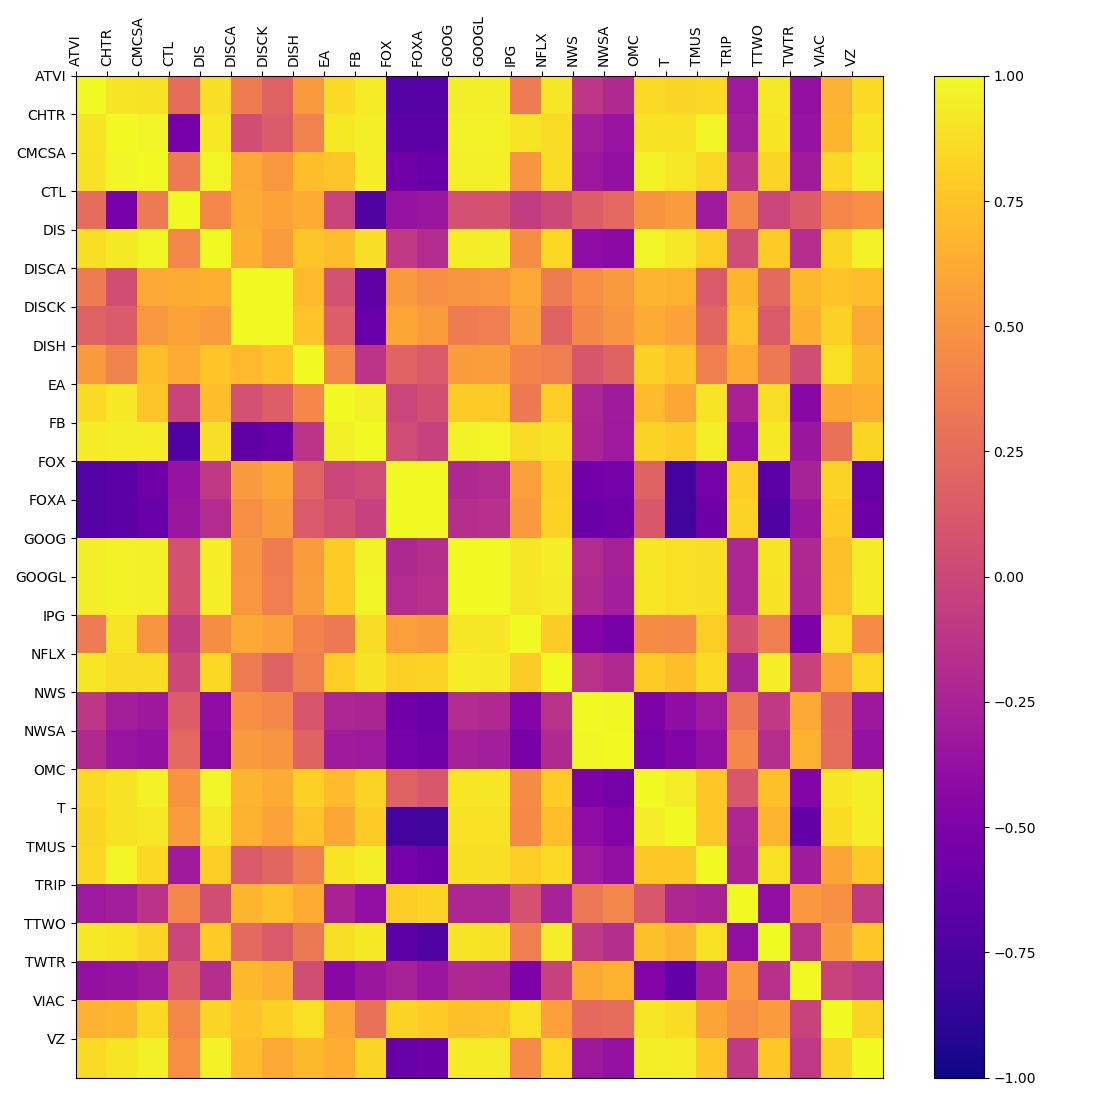

In [28]:
with open("Communication_Services.pickle", "rb") as f:
    tickers = pickle.load(f)
main_df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs1/Communication_Services/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')


    main_df.to_csv('Communication_Services_combined_data')
    
    
df_Communication_Services = pd.read_csv('Communication_Services_combined_data')
df_corr_Communication_Services = df_Communication_Services.corr()
data_Communication_Services = df_corr_Communication_Services.values
print(data_Communication_Services)


figg = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = figg.add_subplot(1,1,1)#grid(1*1,figure = 1)
heat=  ax.pcolor(data_Communication_Services,cmap = plt.cm.plasma)#(heatmap of the data)
figg.colorbar(heat)#

ax1 = ax.set_xticks(np.arange(data_Communication_Services.shape[0]),minor  =False)
ax2 = ax.set_yticks(np.arange(data_Communication_Services.shape[1]),minor  =False)
ax.invert_yaxis()
ax.xaxis.tick_top()


labels_c = df_corr_Communication_Services.columns
labels_r = df_corr_Communication_Services.index

ax.set_xticklabels(labels_c)
ax.set_yticklabels(labels_r)
plt.xticks(rotation = 90)
heat.set_clim(-1,1)
plt.tight_layout()

plt.show()

# NOW WE CREATE THE LABELS AND FEATURES FOR MACHINE LEARNING

This part involves preprocessing the labels to make it ready for machine learning
## We will be training our model for each company
We need to decide for how many days in future we need to predict the prices

### We will be choosing a forecasting the prices seven days from the start date

# Grabbing the list of all the tickers and determining the percent change for next seven days

In [29]:
def process_ticker_for_label(ticker):
    df = pd.read_csv('combined_data',index_col = 0)
    tickers = df.columns.values.tolist()
    df.fillna(0,inplace = True)
    
    for i in range(0,8):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i)-df[ticker])/df[ticker]
        df.fillna(0,inplace = True)
       # print((df[['{}_{}d'.format(ticker,i)]])) 
    return (tickers,df)

# Deciding function to create the labels

Our decision in this part revolves around 2% calculation This implies that if the stock value of a particular company drops more than 2% in past 7 days we sell that stock We hold the stock if the value remains within the range of 2% We buy more stocks if the value of the stocks increases more than 2% in past 7 days

These args are going to be seven day percent change prices in the future

In [30]:
def decide(*args):
    
	col = [i for i in args]
	abc = 0.02
	for i in col:
		if i>abc:
			return 1
		if i<-abc:
			return -1
	return 0 

# Cleaning the data and creating the target columns

The below function will return labels (-1,0,1 ) which will tell us whether to buy,sell or hold a stock

In [31]:

from collections import Counter
def create_features(ticker):
    tickers,df = process_ticker_for_label(ticker)

    df['{}_target'.format(ticker)] = list(map(decide, *[df['{}_{}d'.format(ticker, i)]for i in range(1, 8)]))
    #this maps the seven day prices to the specified company's ticker
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    
    print('Data Spread :',Counter(str_vals))
    
    df= df.replace([-np.inf,np.inf],np.nan)
    # when there a percentage from 0 to a value, we replace (-infinity and + infinity) with np nan value
    
    df.dropna(inplace = True)
    countt = Counter(str_vals)
    '''
    now if we passed all the values for the 7 days to a classifier, the classifier is going to learn and train super fast
    and we will get a high accuracy which is wrong
    so we will just pass the value as opposed to the yestarday's value

    for this we need to normalise
    '''
    
    df_vals = df[[i for i in tickers]].pct_change()
    df_vals = df_vals.replace([-np.inf,np.inf],np.nan)
    df_vals.fillna(0,inplace = True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
   
    # here we normalised the value as opposed to the previous day
    #plt.plot(X)
#     plt.plot(X,y)
#     plt.show()
    return X, y, df
    
create_features('XRAY')

Data Spread : Counter({'1': 2145, '-1': 1743, '0': 1108})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0397348 , -0.02857155,  0.        , ...,  0.        ,
         -0.0484234 ,  0.        ],
        [ 0.02896514, -0.00183812,  0.        , ...,  0.        ,
         -0.00118368,  0.        ],
        ...,
        [-0.00724593,  0.009473  ,  0.00293262, ...,  0.02073982,
         -0.00670476,  0.01014554],
        [ 0.00298849,  0.00324828, -0.00085282, ..., -0.00900718,
          0.01330156, -0.00362231],
        [-0.00785013,  0.00419713,  0.03901959, ...,  0.01458471,
          0.0005878 , -0.02619184]]),
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   26.585411   9.714566   0.000000   18.250000    0.000000   
 2000-01-04   25.529045   9.437006   0.000000   17.812500    0.000000   
 2000-01-05   26.268497   9.419660 

#### Now that we have created features and labels from our data, we will now feed it through a machine learning algorithm and hope that it will learn to map the relationships of existing prices changes to future price changes for a company

# import machine learning modules

In [32]:
from sklearn import svm,neighbors
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

## We are now going to test the predictions on various classifiers inorder to see which one has maximum accuracy

## KNN

In [34]:
def predict_stock(ticker):
    X,y,df = create_features(ticker)
    X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.25)
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    print()
    print()
    return confidence
                                                        

In [36]:
predict_stock('AAPL')
predict_stock('XRAY')
predict_stock('GOOGL')

Data Spread : Counter({'1': 2467, '-1': 2036, '0': 493})
accuracy: 0.40512409927942356
predicted class counts: Counter({-1: 688, 1: 477, 0: 84})


Data Spread : Counter({'1': 2145, '-1': 1743, '0': 1108})
accuracy: 0.3210568454763811
predicted class counts: Counter({0: 529, -1: 375, 1: 345})


Data Spread : Counter({'1': 1820, '0': 1771, '-1': 1405})
accuracy: 0.41025641025641024
predicted class counts: Counter({1: 523, 0: 373, -1: 352})




0.41025641025641024

The accuracy for APPLE is around 44.11% and XRAY is 34% and GOOGLE is 39% 

# Voting Classifier

In [41]:
def predict_stock1(ticker):
    X,y,df = create_features(ticker)
    X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.25)
    clf = VotingClassifier([('lsvc',svm.LinearSVC()),
                            ('knn',neighbors.KNeighborsClassifier()),
                            ('rfor',RandomForestClassifier())])
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    print()
    print()
    
    return confidence


            

In [42]:
predict_stock1('AAPL')
predict_stock1('XRAY')
predict_stock1('GOOGL')

Data Spread : Counter({'1': 2467, '-1': 2036, '0': 493})
accuracy: 0.4771817453963171
predicted class counts: Counter({1: 898, -1: 350, 0: 1})


Data Spread : Counter({'1': 2145, '-1': 1743, '0': 1108})
accuracy: 0.3947157726180945
predicted class counts: Counter({1: 721, -1: 464, 0: 64})


Data Spread : Counter({'1': 1820, '0': 1771, '-1': 1405})
accuracy: 0.47996794871794873
predicted class counts: Counter({1: 604, -1: 354, 0: 290})




0.47996794871794873

 Here we can see that our accuracy increased for all the three stocks 
 The predicted class counts will tell us to weather buy , sell or hold

# Machine learning to get the accuracy for prediction for all 500 companies

In [43]:
from statistics import mean

with open("500tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []
for count,ticker in enumerate(tickers):

    if count%10==0:
        print(count)

    accuracy = predict_stock1(ticker)
    accuracies.append(accuracy)
    print("{} accuracy: {}. Average accuracy:{}".format(ticker,accuracy,mean(accuracies)))

0
Data Spread : Counter({'1': 1951, '-1': 1548, '0': 1497})
accuracy: 0.3931144915932746
predicted class counts: Counter({-1: 426, 1: 424, 0: 399})


MMM accuracy: 0.3931144915932746. Average accuracy:0.3931144915932746
Data Spread : Counter({'1': 2008, '-1': 1680, '0': 1308})
accuracy: 0.388310648518815
predicted class counts: Counter({1: 573, -1: 563, 0: 113})


ABT accuracy: 0.388310648518815. Average accuracy:0.3907125700560448
Data Spread : Counter({'0': 3568, '1': 829, '-1': 599})
accuracy: 0.7483974358974359
predicted class counts: Counter({0: 1044, -1: 110, 1: 94})


ABBV accuracy: 0.7483974358974359. Average accuracy:0.5099408586698418
Data Spread : Counter({'1': 2499, '-1': 2315, '0': 182})
accuracy: 0.4739791833466773
predicted class counts: Counter({1: 633, -1: 616})


ABMD accuracy: 0.4739791833466773. Average accuracy:0.5009504398390507
Data Spread : Counter({'1': 2049, '-1': 1578, '0': 1369})
accuracy: 0.4342948717948718
predicted class counts: Counter({1: 656, -1: 386, 

# CONCLUSION

Here in this project, we did the data analysis on the S&P 500 companies

Initially we webscraped for the 500 tickers and their sectors

Categorized these companies into different sectors and analysed the correlation between them using the heatmaps

Created the features set and label set by analysing the ADJ Close and next day Open prices 

used KNN algorithm to predict the stock prices and decide whether a person should buy,sell or hold prices

Calculated the accuracies using RandomForest Classifier, Support Vector Machine(SVM) 

Did Predictions on all 500 companies

# FUTURE GOALS 

Test this trading stratergy on Quantopian

Study Quantopian pipelines and alphabens on Quantopian to develop functions and place a trade order using leverage on Quantopian